In [159]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
import seaborn as sns

In [160]:
players = pd.read_csv('players.csv', index_col=0)

In [161]:
players.head()

,ID,Age,Distance X,Distance Y
0,0,60,0.976263,21.655952
1,1,34,6.174774,10.937657
2,2,37,-19.041299,5.536271
3,3,68,4.899784,-8.200124
4,4,46,-19.032123,-3.346881


In [162]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          1000 non-null   int64  
 1   Age         1000 non-null   int64  
 2   Distance X  1000 non-null   float64
 3   Distance Y  1000 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 39.1 KB


In [163]:
players.describe()

,ID,Age,Distance X,Distance Y
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,47.555000,-0.112058,-0.338178
std,288.819436,17.978214,12.868379,12.685099
min,0.000000,18.000000,-39.546455,-39.076308
25%,249.750000,32.000000,-9.134154,-9.395742
50%,499.500000,47.000000,-0.170264,-0.364127
75%,749.250000,63.000000,9.284641,8.922113
max,999.000000,79.000000,39.617838,39.912491


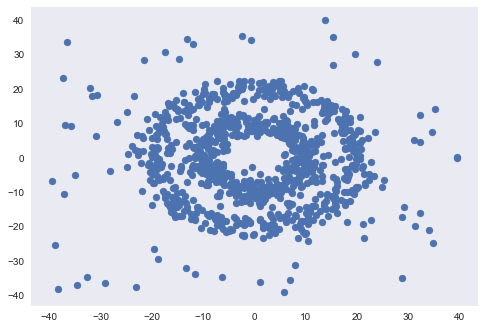

In [164]:
plt.scatter(players['Distance X'], players['Distance Y'])

In [188]:
#Transforming coordinate system into distance in KM from players location to the headquaters.
players['Distance in KM'] = round(np.sqrt((players['Distance X']**2) + (players['Distance Y']**2)),2)

In [189]:
players.head()

,ID,Age,Distance X,Distance Y,Distance in KM
0,0,60,0.976263,21.655952,21.68
1,1,34,6.174774,10.937657,12.56
2,2,37,-19.041299,5.536271,19.83
3,3,68,4.899784,-8.200124,9.55
4,4,46,-19.032123,-3.346881,19.32


In [190]:
#Dropping unneeded columns.
players_clean = players.drop(columns=['Distance X','Distance Y'])

In [191]:
players_clean.describe()

,ID,Age,Distance in KM
count,1000.000000,1000.000000,1000.000000
mean,499.500000,47.555000,16.465580
std,288.819436,17.978214,7.433037
min,0.000000,18.000000,2.690000
25%,249.750000,32.000000,10.332500
50%,499.500000,47.000000,17.205000
75%,749.250000,63.000000,20.520000
max,999.000000,79.000000,54.020000


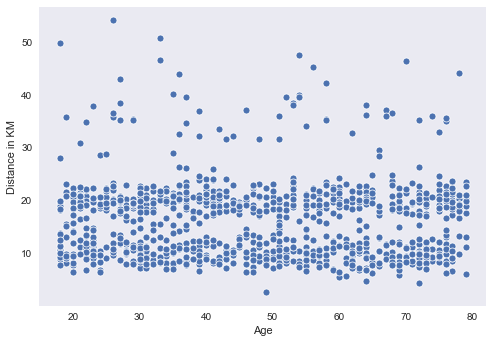

In [192]:
#Chcecking the data distribution.
sns.scatterplot(players_clean['Age'], players_clean['Distance in KM'])

(array([519., 481.]), array([18. , 48.5, 79. ]), <a list of 2 Patch objects>)

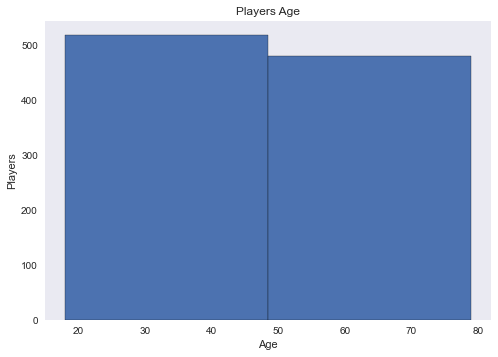

In [210]:
#Binning the age of the players to see the distribution more clearly 
plt.title('Players Age')
plt.xlabel('Age')
plt.ylabel('Players')
plt.hist(players_clean['Age'], bins=2, edgecolor='black')

In [211]:
# Introducing new column to divide players into two distinguish age groups. Using the mean value as a dividing point
players_clean["Age Group Description"] = pd.cut(players_clean['Age'], [0, 48, 80], right=False, labels=["Under 48y", "Over 48y"])
players_clean["Age Group Description"].value_counts()

Under 48y    504
Over 48y     496
Name: Age Group Description, dtype: int64

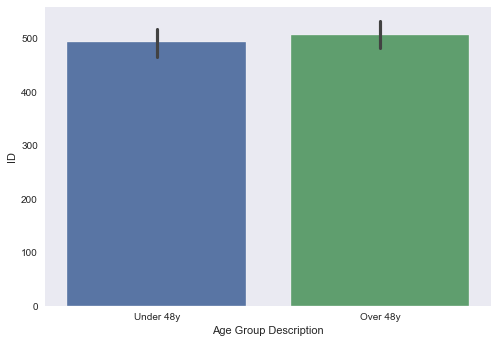

In [212]:
sns.barplot(x="Age Group Description", y="ID", data=players_clean)

In [213]:
# Introducing new column to divide players into two distinguish groups based on distance to headquarters. Using the mean value as a dividing point.
players_clean["Distance Description"] = pd.cut(players_clean['Distance in KM'], [0, 16.47, 60], right=False, labels=["Close to HQ", "Far to HQ"])
players_clean["Distance Description"].value_counts()

Far to HQ      517
Close to HQ    483
Name: Distance Description, dtype: int64

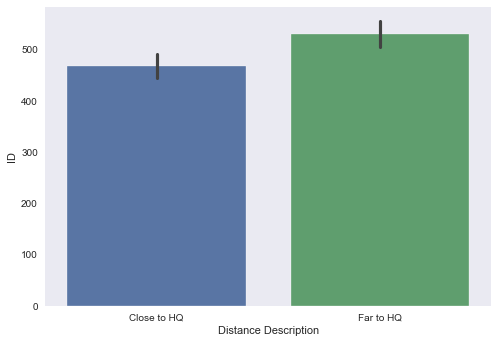

In [214]:
sns.barplot(x="Distance Description", y="ID", data=players_clean)

In [215]:
players_clean.head()

,ID,Age,Distance in KM,Age Group Description,Distance Description,Player Category
0,0,60,21.68,Over 48y,Far to HQ,After 48y & Over 16.5km
1,1,34,12.56,Under 48y,Close to HQ,Under 48y & Under 16.5km
2,2,37,19.83,Under 48y,Far to HQ,Under 48y & Over 16.5km
3,3,68,9.55,Over 48y,Close to HQ,After 48y & Under 16.5km
4,4,46,19.32,Under 48y,Far to HQ,Under 48y & Over 16.5km


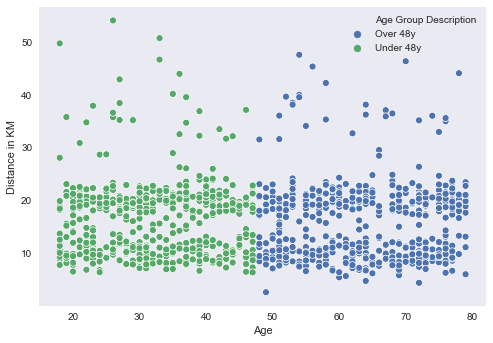

In [216]:
#Chcecking the data distribution with new age description column.
sns.scatterplot(players_clean['Age'], players_clean['Distance in KM'], 
                hue=players_clean["Age Group Description"])

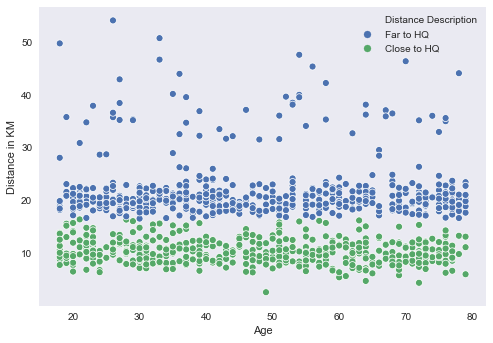

In [217]:
#Chcecking the data distribution with new distance description column.
sns.scatterplot(players_clean['Age'], players_clean['Distance in KM'], 
                hue=players_clean["Distance Description"])

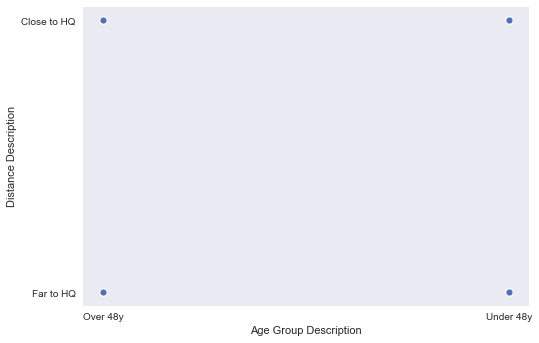

In [218]:
#Chcecking the data distribution for newly created distinct player categories.
sns.scatterplot(players_clean["Age Group Description"], players_clean["Distance Description"])

In [219]:
# Introducing final column with player categorization based on age and distance from the headquaters.
players_clean["Player Category"] = players_clean["Age Group Description"].astype(str) + ' & ' + players_clean["Distance Description"].astype(str)
players_clean["Player Category"].value_counts()

Under 48y & Far to HQ      264
Over 48y & Far to HQ       253
Over 48y & Close to HQ     243
Under 48y & Close to HQ    240
Name: Player Category, dtype: int64

In [220]:
players_clean.head()

,ID,Age,Distance in KM,Age Group Description,Distance Description,Player Category
0,0,60,21.68,Over 48y,Far to HQ,Over 48y & Far to HQ
1,1,34,12.56,Under 48y,Close to HQ,Under 48y & Close to HQ
2,2,37,19.83,Under 48y,Far to HQ,Under 48y & Far to HQ
3,3,68,9.55,Over 48y,Close to HQ,Over 48y & Close to HQ
4,4,46,19.32,Under 48y,Far to HQ,Under 48y & Far to HQ


Text(0.5, 1.0, 'Players Categories - Amount of Players')

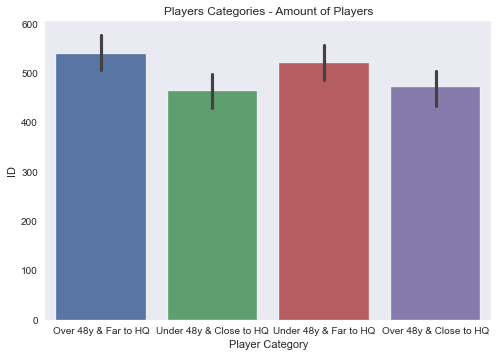

In [221]:

sns.barplot(x="Player Category", y="ID", data=players_clean).set_title('Players Categories - Amount of Players')

In [222]:
# Saving categorized data 
players_clean.to_csv('players_categorized.csv',index=False)